<a href="https://colab.research.google.com/github/senthil15092005/AIML-/blob/main/HR_comma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/HR_comma_sep.csv')

# Preview the data
print(df.head())

# Check info and missing values
print(df.info())
print(df.isnull().sum())

# Summary statistics
print(df.describe())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

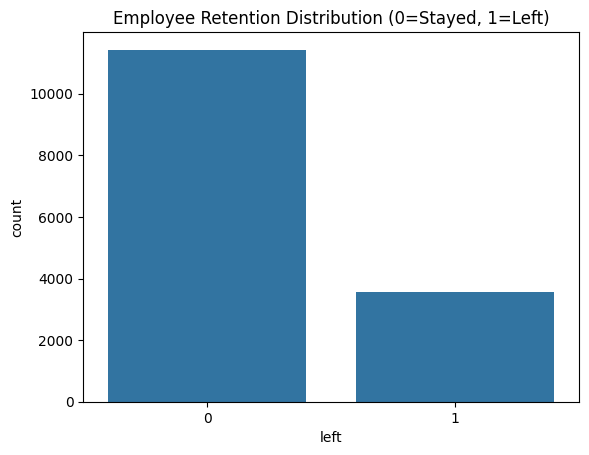

In [23]:
sns.countplot(x='left', data=df)
plt.title('Employee Retention Distribution (0=Stayed, 1=Left)')
plt.show()


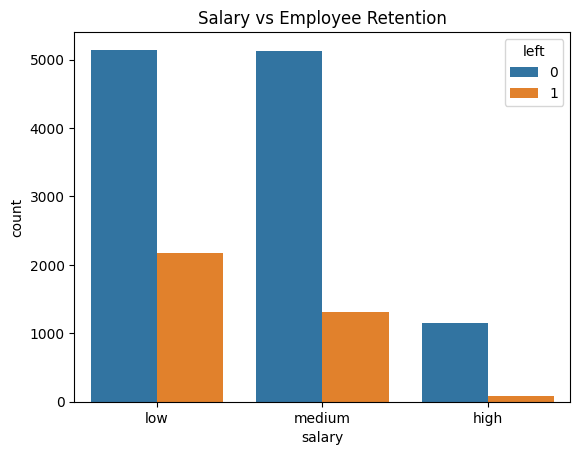

In [24]:
sns.countplot(x='salary', hue='left', data=df)
plt.title('Salary vs Employee Retention')
plt.show()


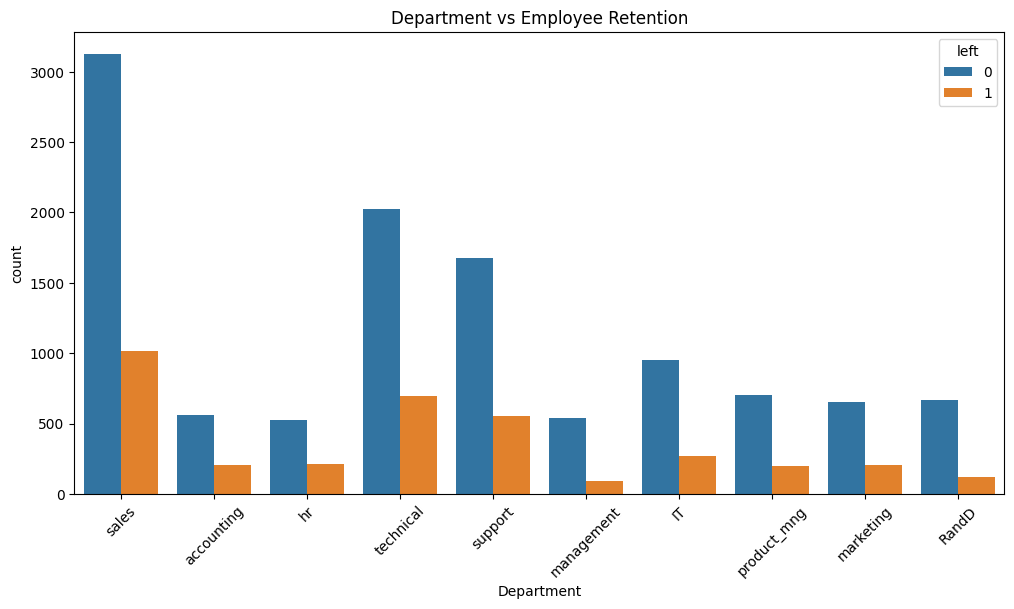

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Department vs Employee Retention')
plt.xticks(rotation=45)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode salary to numeric
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])

# Features and target
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
y = df['left']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # increase max_iter if convergence warning
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.76
Confusion Matrix:
[[2109  185]
 [ 545  161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

